# Machine Learning Training :

##  => Project 1 : Fraud Detection Credit Card (classificaiton)

In [ ]:
!pip3 install lazypredict kaggle 

In [5]:
# SET YOUR OWN PATH WHERE YOU WANT TO KEEP DATASET
import platform
if platform.system() == "Linux":
    data = "/home/sanjayk/Documents/data/"
else:
    data = "/Users/sanjayk/Documents/data"

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import kaggle
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Lazy Classifier # Classifier : Studied
from lazypredict.Supervised import LazyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [9]:
# Download the data once
kaggle.api.authenticate()
kaggle.api.dataset_download_files("yashpaloswal/fraud-detection-credit-card", path=datasetDir, unzip=True) 

Dataset URL: https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card


In [6]:
os.listdir(datasetDir)

['Mall_Customers.csv',
 'diabetes_012_health_indicators_BRFSS2015.csv',
 'creditcard.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv',
 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'Historical Presidents Physical Data (More).csv']

In [7]:
df = pd.read_csv(datasetDir + 'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
print(f"Size of the dataset : {df.shape[0]}")

Size of the dataset : 284807


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [10]:
#checking if dataframe has any missing values in any column
for column in df:
    print(f'Attribute => {column} : {df[column].isna().sum()}')

Attribute => Time : 0
Attribute => V1 : 0
Attribute => V2 : 0
Attribute => V3 : 0
Attribute => V4 : 0
Attribute => V5 : 0
Attribute => V6 : 0
Attribute => V7 : 0
Attribute => V8 : 0
Attribute => V9 : 0
Attribute => V10 : 0
Attribute => V11 : 0
Attribute => V12 : 0
Attribute => V13 : 0
Attribute => V14 : 0
Attribute => V15 : 0
Attribute => V16 : 0
Attribute => V17 : 0
Attribute => V18 : 0
Attribute => V19 : 0
Attribute => V20 : 0
Attribute => V21 : 0
Attribute => V22 : 0
Attribute => V23 : 0
Attribute => V24 : 0
Attribute => V25 : 0
Attribute => V26 : 0
Attribute => V27 : 0
Attribute => V28 : 0
Attribute => Amount : 0
Attribute => class : 0


In [4]:
X = df.drop('class',axis=1)
y = df['class'].ravel()

NameError: name 'df' is not defined

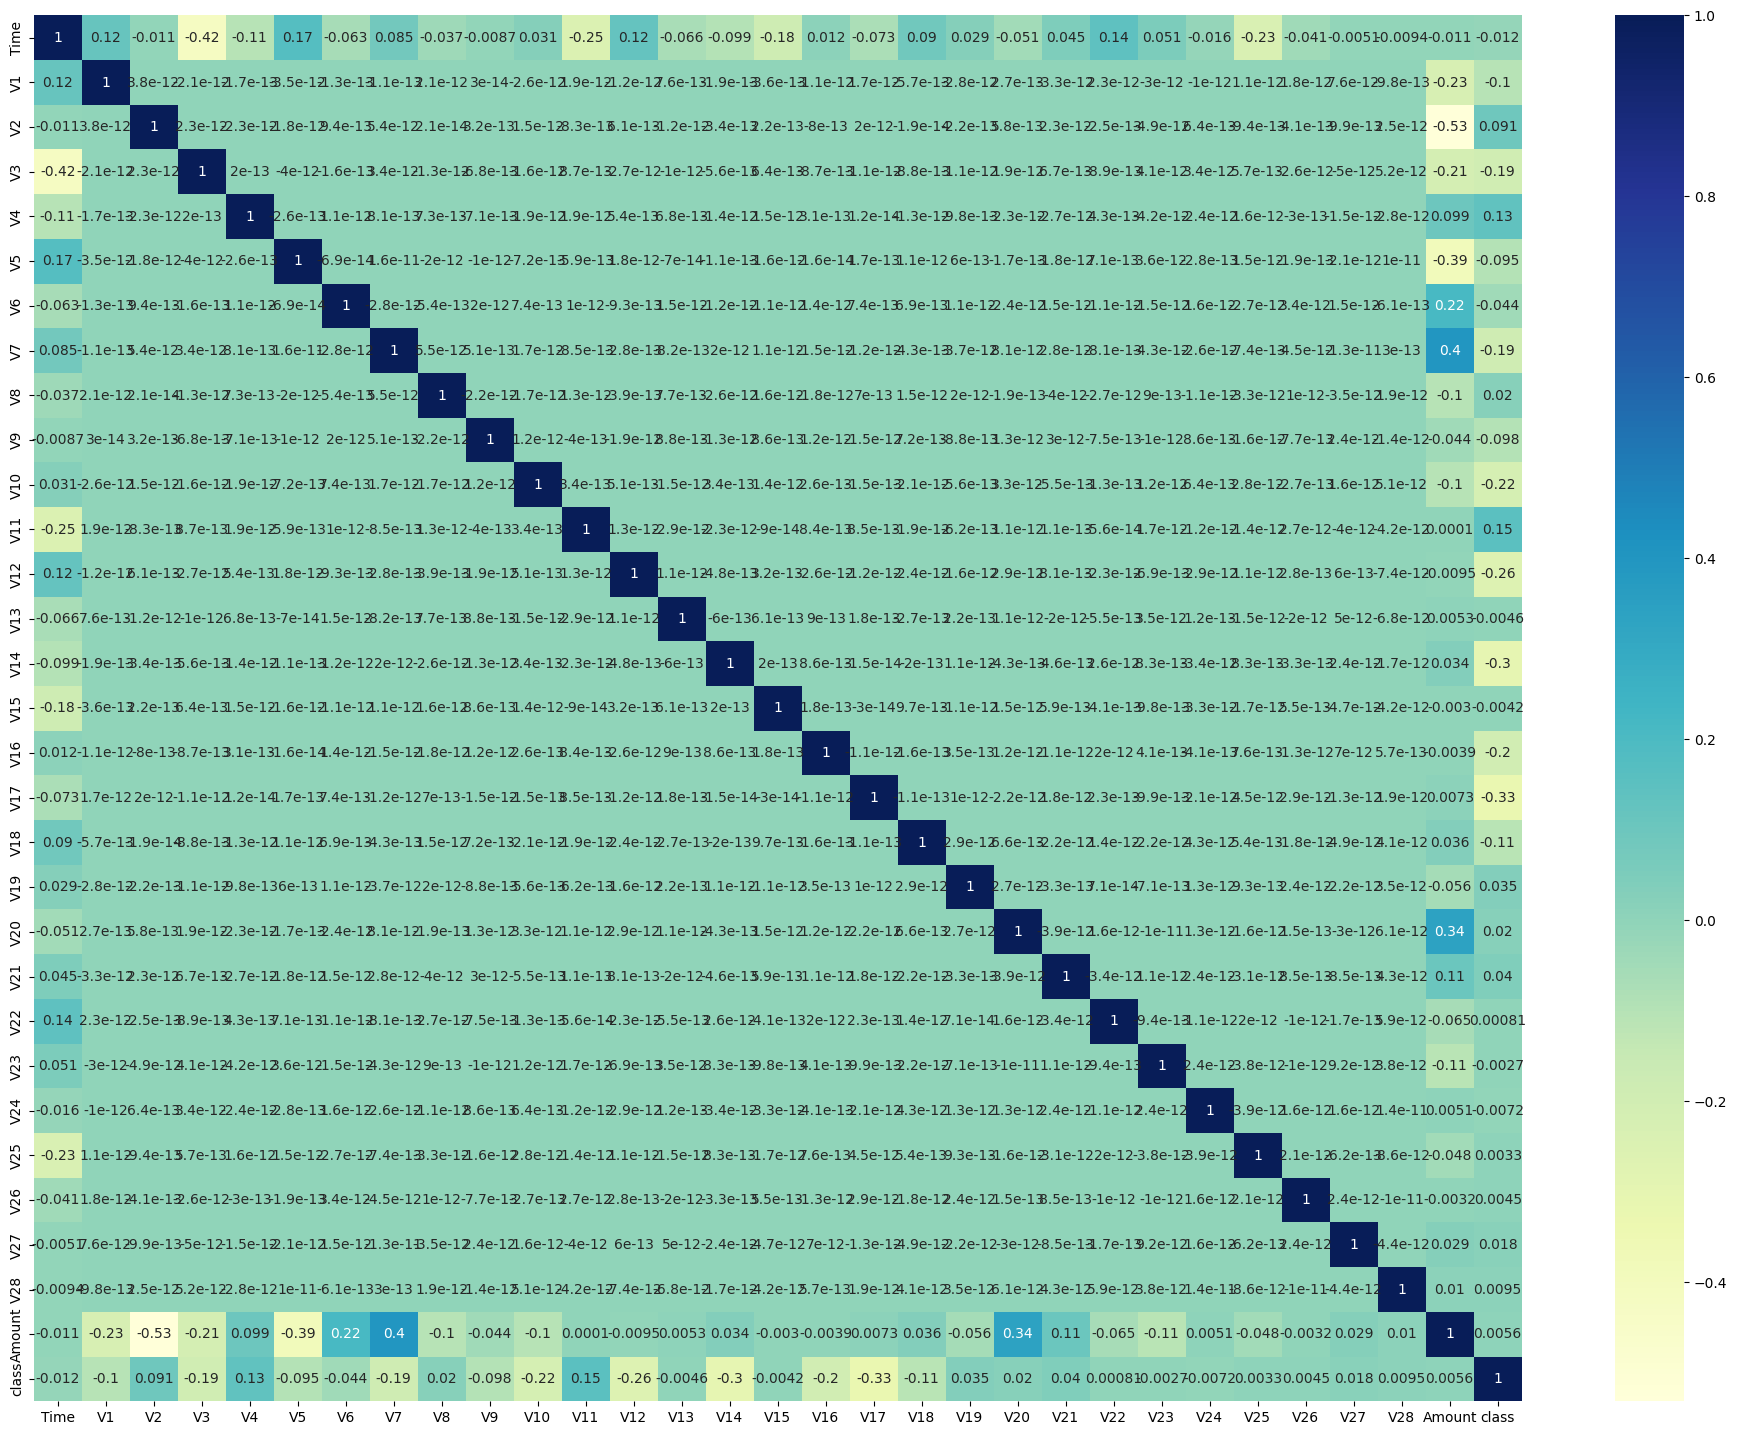

In [12]:
# Drawing the Correlation Matrix for all feature vector
plt.figure(figsize=(24,18))

#plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

##  Computing the feature importance to understand how much  each attributes contributes to Y value

In [3]:
# 1. Random Forest Classifier : : Used for feature importance
clf1 = RandomForestClassifier()
clf1.fit(X,y)
print(clf1.feature_importances_)

NameError: name 'X' is not defined

In [ ]:
# 2. ExtraTree Classifier : Used for feature importance
clf2 = ExtraTreesClassifier()
clf2.fit(X,y)
print(clf2.feature_importances_)

In [ ]:
print("{:10} : {:>20} : {:>20}" .format("Attibutes", "Random Forest", "Extra Tree"))
for index in range(len(df.columns)-1):
    print(f'{df.columns[index]:10} : {clf1.feature_importances_[index]:20.5f} : {clf2.feature_importances_[index]:20.5f}')

In [ ]:
# Accuracy is getting computed on one Training / Testing Sample 
# When you run the project multiple times,
# Accuracy keeps changing in each classfier. 
# (Can't say my Logisitic Regression works better in all cases)

# Cross Validation  (Run the code multiple times with different training /Testing modules)

In [ ]:
# Build'
classifiers = [LogisticRegression(max_iter=1000),GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

#iterating each model
for clf in classifiers:
    
    scores = cross_val_score(clf, X, y, cv=5)

    print(f"Accuracy of {clf.__class__.__name__:30} : {scores.mean():0.3f} +/- {scores.std():0.5f}.")

    
    """
    # Fit the dataset to model so it will computes it's parameters
    clf.fit(xTrain,yTrain)
    
    #Prediction
    yPred = clf.predict(xTest)
    
    #Generating the classification Report
    print(classification_report(yTest,yPred))
    
    #accruracy 
    print(f"Accuracy : {accuracy_score(yTest,yPred)} ")
    
    """
    

In [ ]:
xTrain, xTest, yTrain, yTest =  train_test_split(X, y, train_size=0.7)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models, predictions = clf.fit(xTrain, xTest, yTrain, yTest)

In [ ]:
models

In [ ]:
predictions

In [ ]:
predictions.sort_values(by='Time Taken', ascending=True, na_position='first')

In [ ]:
predictions.sort_values(by='Accuracy', ascending=True, na_position='first')